# ***Importing Required Libraries***

In [8]:
import numpy
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # cv2.imshow doesnt work , thats why I imported this

# ***Read the image de_grayscale_negative.png as an array, assign to variable img.***

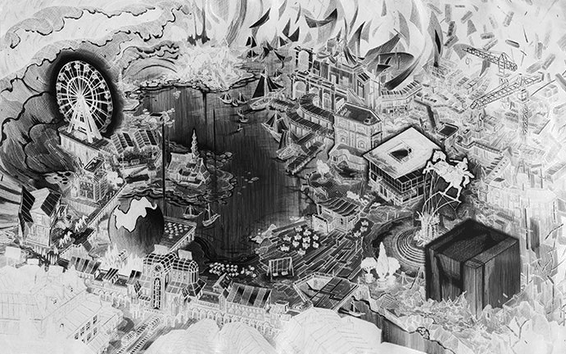

In [24]:
# I will open it in form of grayscale. Because original image is already in form of gray scale. Appearance will not change
img = cv2.imread("/content/de_grayscale_negative.png",cv2.IMREAD_GRAYSCALE) 
cv2_imshow(img)

# ***Calculate the negative image with Numpy.***

In [10]:
# When we subtract each pixel from maximum intensity value , we get negative of image.
# Firstly, we have to find maximum intensity value.
img.dtype

dtype('uint8')

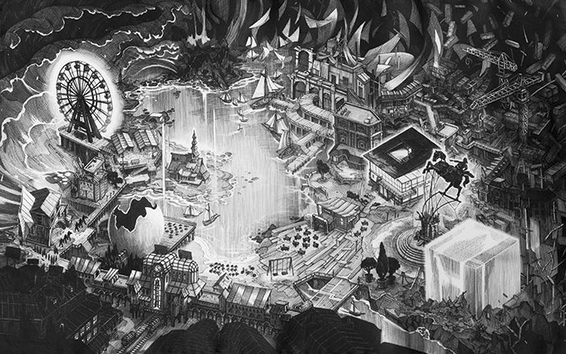

In [15]:
# Since it is 8 bit image. Maximum intensity value can be 255.
# When we subtract each pixel from 255 , we will get negative of image.
ones = numpy.ones(shape=img.shape)
img_neg = (ones*255 - img)
cv2_imshow(img_neg)

# ***Display pixel intensity histogram of img and img_neg, compare the differences.***

Text(0.5, 1.0, 'Histogram of img')

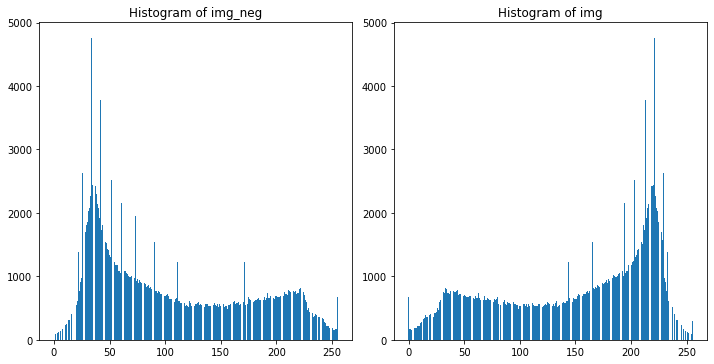

In [21]:
histogram_img = cv2.calcHist([img],[0],None,[256],[0,256]).astype(int).reshape(256,) # It calculates histagram
pixels = numpy.arange(256) # It represents the pixels in the image (0-256)

histogram_img_neg = cv2.calcHist([img_neg.astype(numpy.uint8)],[0],None,[256],[0,256]).astype(int).reshape(256,) # It calculates histagram

fig, axes = plt.subplots(figsize=(10,5), ncols=2)
fig.tight_layout()
axes[0].bar(pixels, histogram_img_neg)
axes[0].set_title("Histogram of img_neg")
axes[1].bar(pixels, histogram_img)
axes[1].set_title("Histogram of img")

# When we look at the result, it can be seen clearly, they are inverses of each other.

# ***Calculate the negative image with OpenCV***

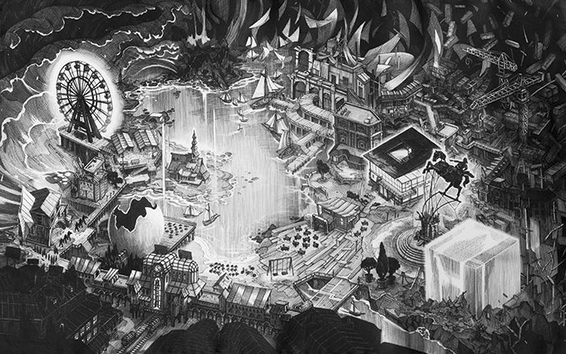

In [ ]:
# I applied not operation.For example, pixel value is 150 which is 10010110 in binary.
# After this operation it will become 105 which is 01101001 in binary.
# In other words, to subtract pixel from 255 which is maximum intensity value. 
img_neg_openCV = cv2.bitwise_not(img)
cv2_imshow(img_neg_openCV)

# ***Concatenate the two images using Numpy and display them side by side***

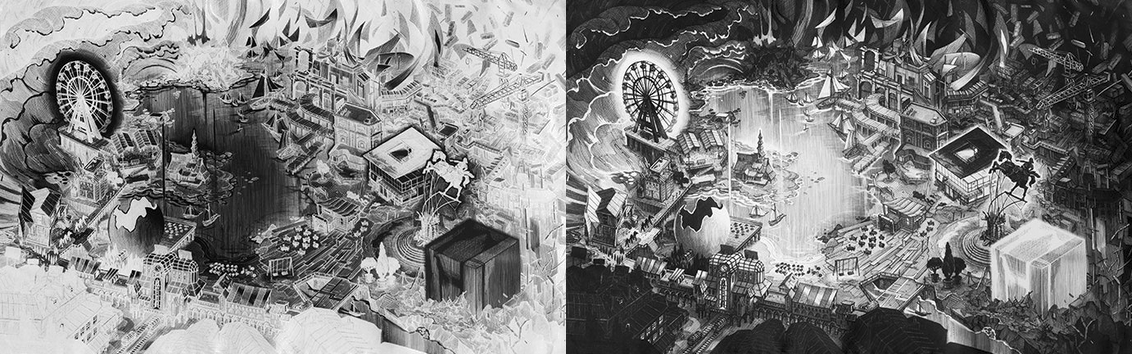

In [73]:
# Firstly I created a numpy array fiiled with zeros.
# This new array's number of rows will be same as other 2 images
# But the number of columns will be sum of other 2 images.
# From columnn 0 to column 566 => first image
# From column 566 to column 1132 => second image 
concatenated_Image = numpy.zeros(shape=(img.shape[0],img.shape[1]*2))
concatenated_Image[:,0:img.shape[1]] = img
concatenated_Image[:,img.shape[1]:] = img_neg
cv2_imshow(concatenated_Image)

# ***Read the image einstein.jpg as an array, assign to variable img2.***

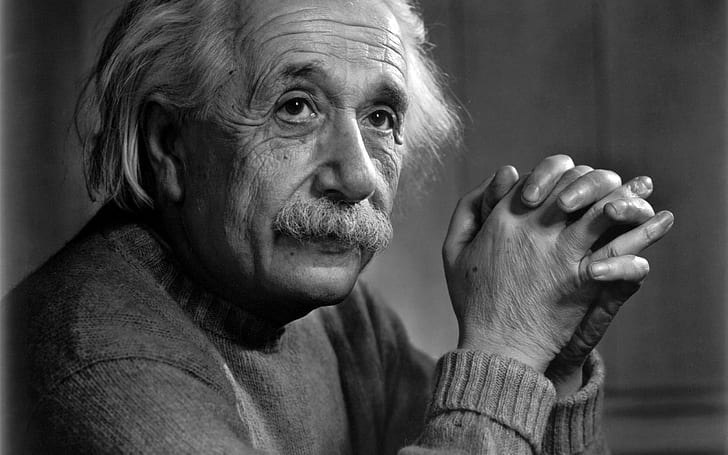

In [53]:
# I will open it in form of grayscale. Because original image is already in form of gray scale. Appearance will not change
img2 = cv2.imread("/content/einstein.jpg",cv2.IMREAD_GRAYSCALE).astype(numpy.uint16)
cv2_imshow(img2)  

# ***Reduce contrast of img2, assign the low contrast image to img2_low.***

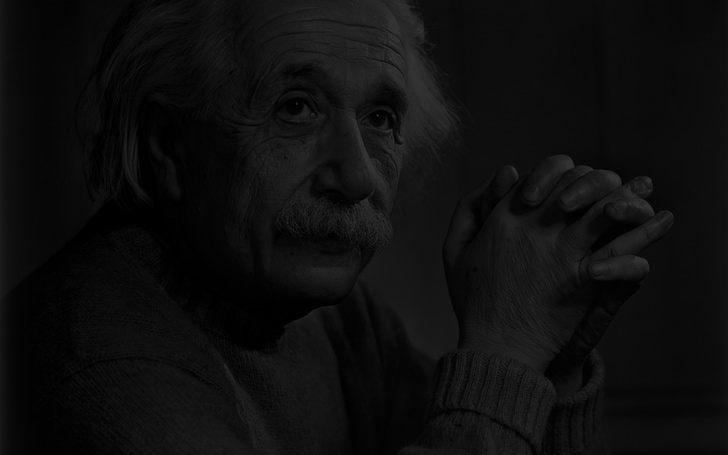

In [54]:
# Contrast is difference between maximum pixel value and minumum pixel value in image
# Low Contrast => Low Difference && High Contrast => High Difference

# the lower value we give contrastValue lower contrast image we get
contrastValue = 0.2
img2_low = img2*contrastValue

cv2_imshow(img2_low)       

# ***Increase contrast of img2, assign the high contrast image to img2_high***

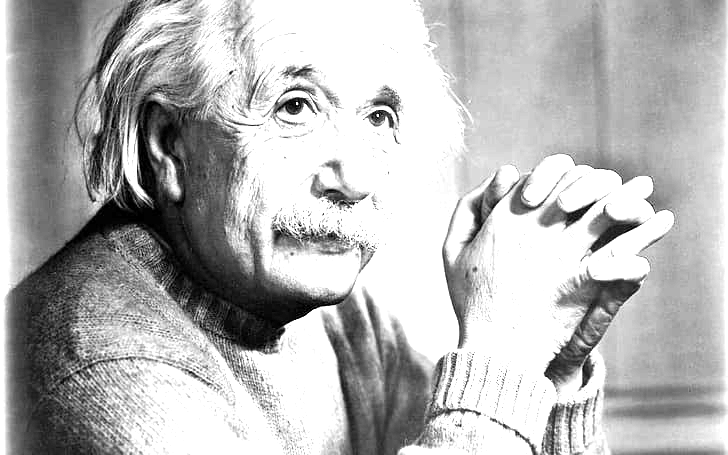

In [55]:
# the higher value we give contrastValue higher contrast image we get
contrastValue = 3
img2_high = img2*contrastValue

cv2_imshow(img2_high)    

# ***Display img2, img2_low and img2_high vertically concatenated***

In [56]:
img2.shape

(455, 728)

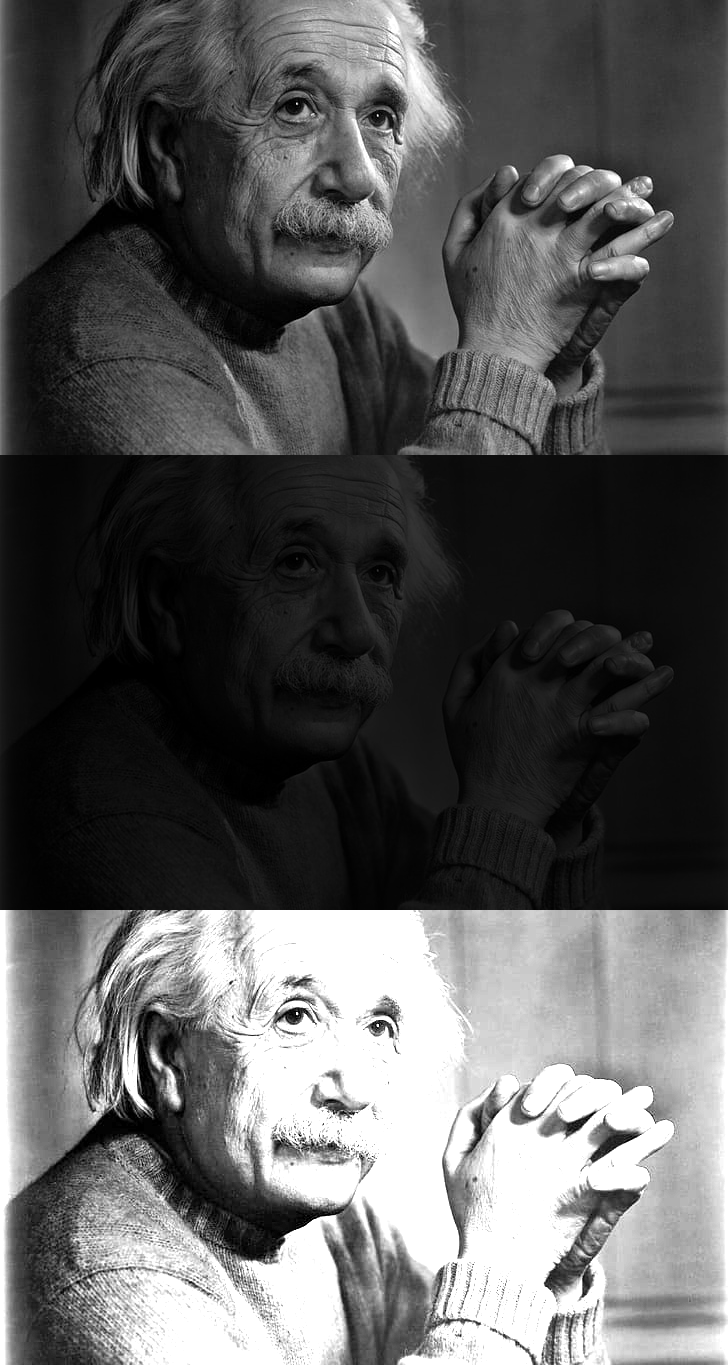

In [58]:
# Firstly I created a numpy array fiiled with zeros.
# This new array's number of rows will be sum of other 3 images ((728 * 3) = 2184)
# But the number of columns will be same as other 3 images.
# From row 0 to row 727 => first image
# From row 728 to row 1455 => second image 
# From row 1456 to row 2184 => third image 

concatenated_img2 = numpy.zeros(shape=(img2.shape[0]*3,img2.shape[1]))
concatenated_img2[0:img2.shape[0],:] = img2
concatenated_img2[img2.shape[0]:img2.shape[0]*2,:] = img2_low
concatenated_img2[img2.shape[0]*2:img2.shape[0]*3,:] = img2_high
cv2_imshow(concatenated_img2)

# ***Show pixel intensity histogram of img2, img2_low and img2_high.***

In [67]:
maxPixel = numpy.amax(img2_high)

Text(0.5, 1.0, 'Histogram of img2_high')

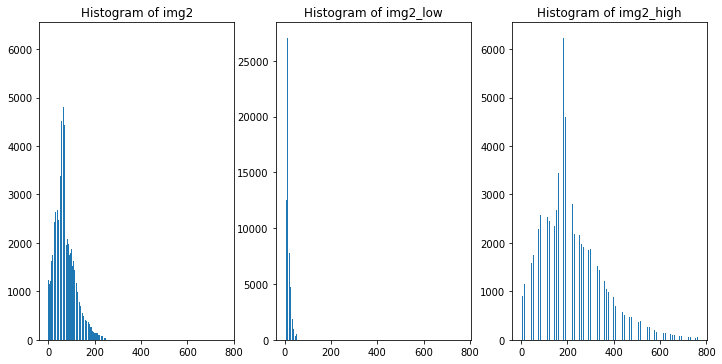

In [72]:
histogram_img2 = cv2.calcHist([img2],[0],None,[maxPixel],[0,maxPixel]).astype(int).reshape(maxPixel,) # It calculates histagram of img2
histogram_img2_low = cv2.calcHist([img2_low.astype(numpy.uint16)],[0],None,[maxPixel],[0,maxPixel]).astype(int).reshape(maxPixel,) # It calculates histagram of img2_low
histogram_img2_high = cv2.calcHist([img2_high.astype(numpy.uint16)],[0],None,[maxPixel],[0,maxPixel]).astype(int).reshape(maxPixel,) # It calculates histagram of img2_high

pixels = numpy.arange(maxPixel) # It represents the pixels in the image (0-maxPixel)

fig, axes = plt.subplots(figsize=(10,5), ncols=3)
fig.tight_layout()

axes[0].bar(pixels, histogram_img2)
axes[0].set_title("Histogram of img2")
axes[1].bar(pixels, histogram_img2_low)
axes[1].set_title("Histogram of img2_low")
axes[2].bar(pixels, histogram_img2_high)
axes[2].set_title("Histogram of img2_high")

# when we see results, it can be seen clearly,in low contrast image, pixels are distributed in narrow range.
# In high contrast image, pixels are distributed in wide range